In [2]:
library(dplyr)

In [3]:
## read CSV
setwd("D:/samples/data_science/iith/002_sem/analytic_databases/assignments/assignment_1/dataset")

user.shows=read.csv("user-shows.txt", sep = ' ', header = F)
user.shows.orig = read.csv("user-shows.txt", sep = ' ', header = F)

In [35]:
dim(user.shows)

[1] 9985  563

**Let us reset forst 100 ratings of user 20 to 0**

In [ ]:
## 20th user's first 100 entries are set to 0
user.shows[20, 1:100] = 0

**Caliculating magnitude of user and item vactors**

In [4]:
user.shows = as.matrix(user.shows)
##calculate the magnitude of the user vectors
user.user = user.shows %*% t(user.shows)
#To check if matrix calculations were correct: 

In [19]:
cat('Total number of ratings by per dataset:',length(user.shows[6, user.shows[6,] ==1]), "\n")
cat('Total number of ratings by per matrix:', user.user[6,6])

stopifnot(length(user.shows[6, user.shows[6,] ==1]) == user.user[6,6])

Total number of ratings by per dataset: 54 
Total number of ratings by per matrix: 54

In [28]:
user.mag = sqrt(diag(diag(user.user)))
user.mag.inv = 1/user.mag #since it is diagnoal matrix, 1/mat-elem will give inverse of matrix
user.mag.inv[is.infinite(user.mag.inv)] = 0
## calculate magnitude of show vectors
show.show = t(user.shows) %*% user.shows
#length(user.shows[, 6][user.shows[,6] == 1]) == show.show[6,6] ^2 
show.mag = sqrt(diag(diag(show.show)))
show.mag.inv = 1/show.mag
show.mag.inv[is.infinite(show.mag.inv)] = 0

**Calculating similarity matrices**

In [29]:
show.similarity = show.mag.inv %*% show.show %*% show.mag.inv
user.similarity = user.mag.inv %*% user.user %*% user.mag.inv

user.filter.recomms = user.similarity %*% user.shows
item.filter.recoms = user.shows %*% show.similarity

** Select top 5 recommendations to user 20 **

In [31]:
#select top 5 to most rated items
top5_index_user_user = order(-user.filter.recomms[20,1:100])[1:5]
top5_index_show_show = order(-item.filter.recoms[20,1:100])[1:5]

user.filter.recomms[top5_index_user_user]
item.filter.recoms[top5_index_show_show]

showNames=read.csv("shows.txt", sep = ' ', header = F)
showNames=t(showNames)

cat("Top 5 shows from user-user collaborative filtering:", "\n")

for(show in showNames[top5_index_user_user])
{
  cat(show, "\n")
}

cat("Top 5 shows from item-item collaborative filtering:", "\n")

for(show in showNames[top5_index_show_show])
{
  cat(show, "\n")
}

[1] 311.3798 261.3808 261.3233 325.9349 218.9820

[1] 25.00941 25.73764 15.41807 23.37502 16.87110

Top 5 shows from user-user collaborative filtering: 
FOX 28 News at 10pm 
Family Guy 
2009 NCAA Basketball Tournament 
NBC 4 at Eleven 
Today 
Top 5 shows from item-item collaborative filtering: 
FOX 28 News at 10pm 
SpongeBob SquarePants 
Family Guy 
Wow Wow Wubbzy 
NBC 4 at Eleven 


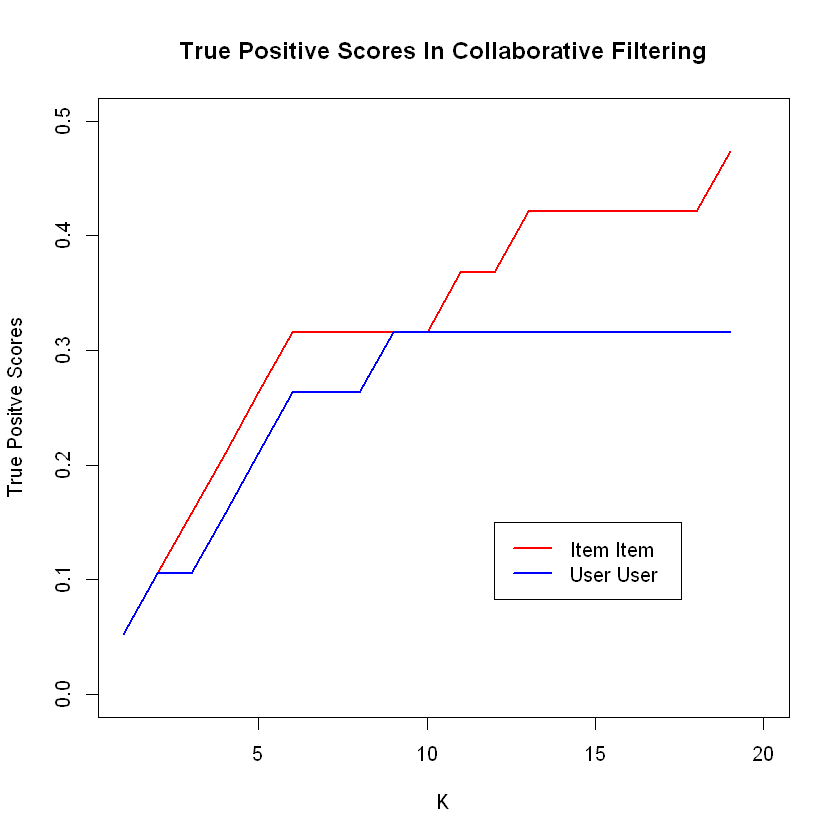

In [32]:
##plotting true positive rate
truePositiveScores = data.frame()
user20shows100 = user.shows.orig[20, 1:100]
showsWatchedin100 = length(user20shows100[1,user20shows100[1,]==1])
#calculating for true positive score for 1 to 50
n = 50
for(k in 1:n)
{
  # get indexes of top-k shows from first 100 shows
  topK_user_user =  order(-user.filter.recomms[20,1:100])[1:k]
  topK_item_item = order(-item.filter.recoms[20,1:100])[1:k]
  
  reality_user_user = length(user20shows100[1,topK_user_user][user20shows100[1, topK_user_user] == 1])
  reality_item_item = length(user20shows100[1, topK_item_item][user20shows100[1, topK_item_item] == 1])
  
  truePositiveScores = rbind(truePositiveScores, c(k, reality_user_user/showsWatchedin100, reality_item_item/showsWatchedin100))
}

names(truePositiveScores) = c("k", "TPS_UserUser", "TPS_ItemItem")

#plot(x=truePositiveScores$k, y=truePositiveScores$TPS_UserUser, type = "l", col="red", xlab = "K", ylab = "True Positive Score")
#lines(x=truePositiveScores$k, y=truePositiveScores$TPS_ItemItem, col="blue")

with(truePositiveScores, 
     { plot(k[1:19], TPS_UserUser[1:19], type="n", main = "True Positive Scores In Collaborative Filtering", xlab = "K", ylab = "True Positve Scores", ylim=c(0,.5), xlim = c(1,20) ); 
      lines(x=k[1:19], y=TPS_ItemItem[1:19], col="red", lwd=2);
      lines(x=k[1:19], y=TPS_UserUser[1:19], col="blue", lwd=2);
      legend(12,.15, c("Item Item", "User User"), col=c("red", "blue"), lty = c(1,1), lwd=c(2,2) ) } ); 

### as we can see item-item filtrering doing a better job.